# Use narrow data from BioLector I

In [1]:
import numpy
import pandas
import pathlib
import matplotlib.cm
from matplotlib import pyplot
import seaborn
import bletl

### Parse the raw data file

In [2]:
filepath = pathlib.Path(r'..\bletl\tests\data\BL1\NT_1200rpm_30C_DO-GFP75-pH-BS10_12min_20171221_121339.csv')
bldata = bletl.parse(filepath, lot_number=1515, temp=30)
bldata

{'DO': <bletl.core.FilterTimeSeries at 0x127dee79348>,
 'GFP75': <bletl.core.FilterTimeSeries at 0x127daf22788>,
 'pH': <bletl.core.FilterTimeSeries at 0x127dee50388>,
 'BS10': <bletl.core.FilterTimeSeries at 0x127ded45dc8>}

### Get narrow data

In [6]:
narrow = bldata.get_narrow_data()
narrow.head()

ValueError: could not convert string to float: 'A01'

In [4]:
narrow.dtypes

well      object
cycle      int64
time     float64
DO       float64
GFP75    float64
pH       float64
BS10     float64
dtype: object

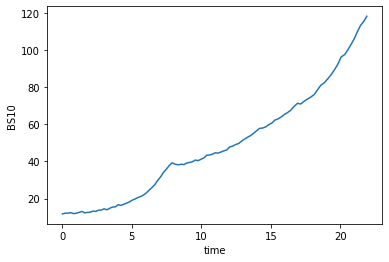

In [5]:
seaborn.lineplot(data=narrow.groupby('well').get_group('A01'), x='time', y='BS10')